## Import Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

### Read Data

In [2]:
playStore_df = pd.read_csv('googleplaystore.csv')

In [3]:
playStore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
playStore_df.shape

(10841, 13)

In [5]:
playStore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
playStore_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Data Cleaning

In [7]:
playStore_df.dropna(how='any',inplace=True)

In [8]:
playStore_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [9]:
playStore_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [10]:
playStore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Size Column Cleaning

In [11]:
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)
        return(x)
    else:
        return None

In [12]:
playStore_df['Size'] = playStore_df['Size'].map(change_size)

In [13]:
playStore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            7723 non-null   float64
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1023.8+ KB


In [14]:
playStore_df.describe()

,Rating,Size
count,9360.000000,7723.000000
mean,4.191838,22970.456105
std,0.515263,23449.628935
min,1.000000,8.500000
25%,4.000000,5300.000000
50%,4.300000,14000.000000
75%,4.500000,33000.000000
max,5.000000,100000.000000


In [15]:
playStore_df['Size'].isnull().sum()

1637

In [16]:
#  Filling Na value in size column
playStore_df.Size.fillna(method='ffill',inplace=True)

In [17]:
playStore_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### Cleaning Review Column

In [18]:
playStore_df.Reviews = playStore_df.Reviews.astype('int')

In [19]:
playStore_df.Reviews.describe()

count    9.360000e+03
mean     5.143767e+05
std      3.145023e+06
min      1.000000e+00
25%      1.867500e+02
50%      5.955000e+03
75%      8.162750e+04
max      7.815831e+07
Name: Reviews, dtype: float64

### Cleaning Install Column

In [20]:
playStore_df.Installs.value_counts()

1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [21]:
# Need to remove + & , Using def

def clean_install(val):
    return int(val.replace(",","").replace("+",""))

In [22]:
playStore_df.Installs = playStore_df.Installs.map(clean_install)

In [23]:
playStore_df.Installs.value_counts()

1000000       1576
10000000      1252
100000        1150
10000         1009
5000000        752
1000           712
500000         537
50000          466
5000           431
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

In [24]:
playStore_df.Installs.describe()

count    9.360000e+03
mean     1.790875e+07
std      9.126637e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

### Cleaning price column

In [25]:
playStore_df.Price.value_counts(5)[:5]

0        0.931090
$2.99    0.012179
$0.99    0.011325
$4.99    0.007479
$1.99    0.006303
Name: Price, dtype: float64

there is $ sign and 0. So we need some conditional cleaning
1. first, let's modify the column to take 0 if value is 0, else take the first letter onwards

In [26]:
playStore_df['Price'] = playStore_df['Price'].map(lambda x: 0 if x == '0' else float(x[1:]))

In [27]:
playStore_df['Price'].head(5)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64

## Sanity Check
1. Average rating should be between 1 and 5, as only these values are allowed to have on the play store 
2. Drop any rows that have been outside from range

In [28]:
playStore_df.Rating.describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

1. Rating looks lood as Min = 1 and Max = 5
2. Need to check the rating value beyond Range 

### Cleaning Review Column

In [29]:
# Check the length which review greater than Install
len(playStore_df[playStore_df.Reviews > playStore_df.Installs])

7

In [30]:
playStore_df[playStore_df.Reviews > playStore_df.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,30000.0,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1,2.3 and up


In [31]:
playStore_df = playStore_df[playStore_df.Reviews <= playStore_df.Installs].copy()

In [32]:
playStore_df.shape

(9353, 13)

### Free App Analysis
For 'FREE' app price shold not more than zero. Any such App would be dropped 

In [33]:
len(playStore_df[(playStore_df.Type == 'Free') & (playStore_df.Price > 0)])

0

## Perform Univariate Analysis

#### boxplot for price

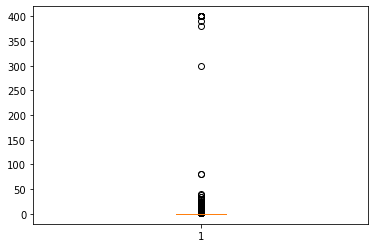

In [34]:
plt.boxplot(playStore_df.Price)
plt.show()

#### 1. Ans for price-There is some outlier

#### Boxplot for Review

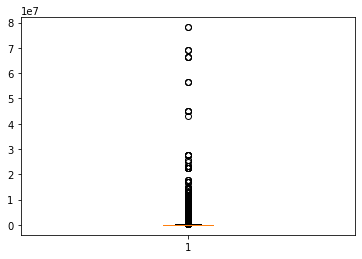

In [35]:
plt.boxplot(playStore_df.Reviews)
plt.show()

#### 2. Ans for Review There is some value which have very high value

#### Histogram for rating

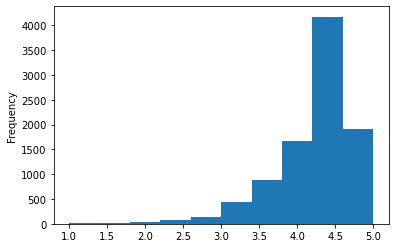

In [36]:
playStore_df.Rating.plot.hist()
plt.show()

#### 3. Ans for Rating- This is right skewed . and ahve more apps fro higher ratings

#### Histogram for size

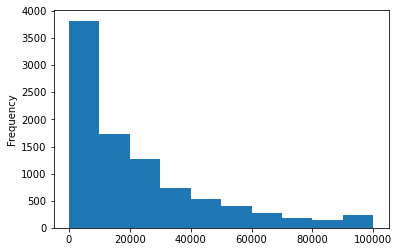

In [37]:
playStore_df.Size.plot.hist()
plt.show()

#### 4. Ans for size- This is left skewed .less size has more user

### Somethings seems abnormal in price column

In [38]:
len(playStore_df[playStore_df.Price > 200])

15

In [39]:
playStore_df[playStore_df.Price > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [40]:
playStore_df = playStore_df[playStore_df.Price <= 200].copy()

playStore_df.shape

(9338, 13)

### Drop the record for 2 Million Reviews

In [41]:
playStore_df = playStore_df[playStore_df.Reviews <= 2000000]
playStore_df.shape

(8885, 13)

### Drop very high Install
Find out different percentiles

In [42]:
len(playStore_df[playStore_df.Installs >= 1000000000])

6

In [43]:
playStore_df.Installs.quantile([0.10,0.25,0.50,0.70,0.90,0.95,0.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

From the above number of install value. It looks likes there are just 1% app having  more than 100 M installs. These
apps might be actual. but for skeness of data we need to drop these value

## Bivariate Analysis
1. scatter plot/joinplot for Rating vs. Price

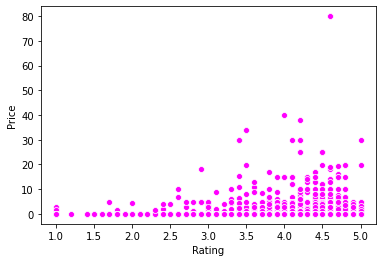

In [44]:
sns.scatterplot(x=playStore_df['Rating'],y=playStore_df['Price'],color='magenta',data=playStore_df)
plt.savefig('Rating_Price_scatterplot.jpg')

we obserbe that price going to increase with rating

2. scatter plot/joinplot for Rating vs. Size

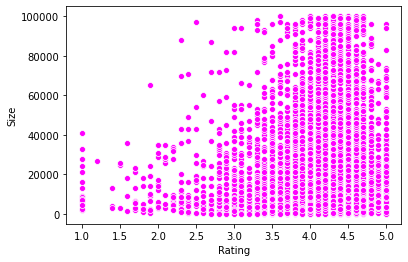

In [45]:
sns.scatterplot(x=playStore_df['Rating'],y = playStore_df['Size'],color='magenta',data=playStore_df)
plt.savefig('Rating_size_scatterplot.jpg')

3. scatter plot/joinplot for Rating vs. Reviews

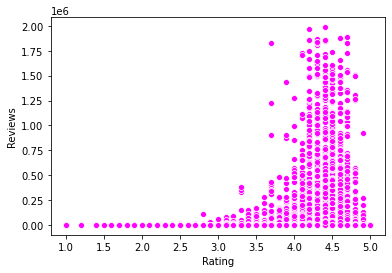

In [46]:
sns.scatterplot(x = playStore_df['Rating'],y = playStore_df['Reviews'],color = 'magenta',data=playStore_df)
plt.savefig('Rating_Review_scatterplot.jpg')

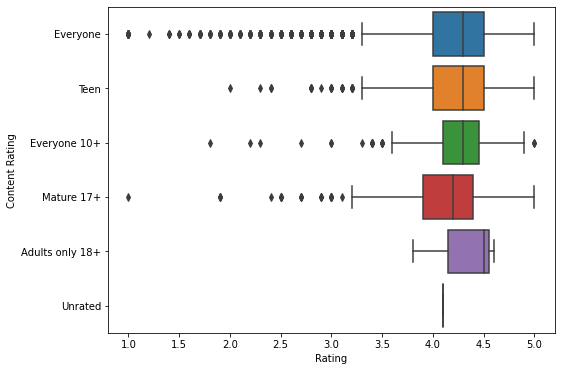

In [47]:
plt.figure(figsize=[8,6])
sns.boxplot(x = playStore_df['Rating'],y = playStore_df['Content Rating'])
plt.savefig('Rating_ContentRating_Boxplot.jpg')

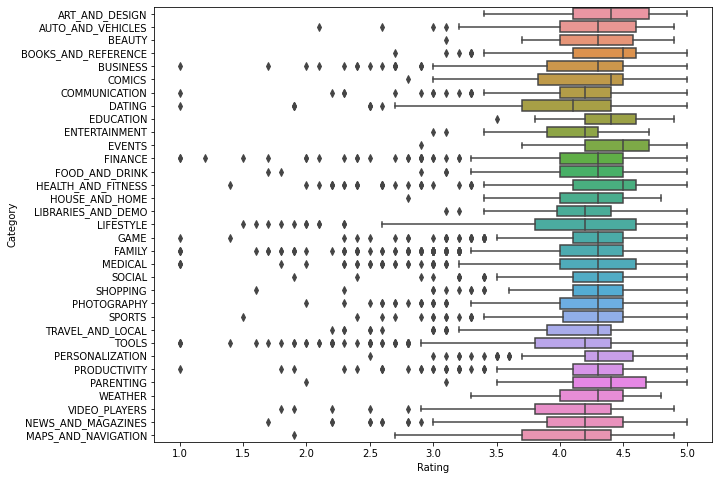

In [48]:
plt.figure(figsize=[10,8])
sns.boxplot(x = playStore_df['Rating'], y =playStore_df['Category'])
plt.savefig('Rating_Category_Boxplot.jpg')

## Data Procssing
Making copy of entire data sheet

In [49]:
inp1 = playStore_df.copy()

#### Install column Re-cleaning

In [50]:
inp1.Installs.describe()

count    8.885000e+03
mean     6.267379e+06
std      3.539960e+07
min      5.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [51]:
inp1.Installs = inp1.Installs.apply(np.log1p)

In [52]:
inp1.Installs.describe()

count    8885.000000
mean       11.987075
std         3.623147
min         1.791759
25%         9.210440
50%        13.122365
75%        15.424949
max        20.723266
Name: Installs, dtype: float64

#### Review column Re-cleaning

In [53]:
inp1.Reviews.describe()

count    8.885000e+03
mean     1.049148e+05
std      2.674675e+05
min      1.000000e+00
25%      1.590000e+02
50%      4.290000e+03
75%      5.689700e+04
max      1.986068e+06
Name: Reviews, dtype: float64

In [54]:
inp1.Reviews = inp1.Reviews.apply(np.log1p)

In [55]:
inp1.Reviews.describe()

count    8885.000000
mean        8.025321
std         3.570637
min         0.693147
25%         5.075174
50%         8.364275
75%        10.949015
max        14.501668
Name: Reviews, dtype: float64

### Drop the column App, Last Updated, Current Version, and Android Version

In [56]:
inp1.drop(['App','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)

In [57]:
inp1.shape

(8885, 9)

#### Getting dummy variables for Category, Genres, Content Rating

In [58]:
inp1.dtypes

Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
dtype: object

In [59]:
inp2 = pd.get_dummies(inp1,drop_first=True)

In [60]:
inp2.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Tools', 'Genres_Tools;Education', 'Genres_Travel & Local',
       'Genres_Travel & Local;Action & Adventure', 'Genres_Trivia',
       'Genres_Video Players & Editors',
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=157)

## Train-Test split Method

In [61]:
 df_train, df_test = train_test_split(inp2,train_size = 0.7, random_state = 100)

In [62]:
df_train.shape,df_test.shape

((6219, 157), (2666, 157))

### Separate the dataframes into X_train, y_train, X_test, and y_test.

In [63]:
y_train = df_train.pop('Rating')
x_train = df_train

In [64]:
y_test = df_test.pop('Rating')
x_test = df_train

## Model Building
#### and import packages

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
model = LinearRegression()

In [67]:
model.fit(x_train,y_train)

LinearRegression()

### To find Report the R2 on the train set
Import packages

In [68]:
from sklearn.metrics import r2_score

In [69]:
y_train_pred = model.predict(x_train)

r2_score(y_train,y_train_pred)

0.16609972164460496

In [70]:
y_test_pred = model.predict(x_test)

r2_score(y_train,y_train_pred)

0.16609972164460496

In [71]:
model.score(x_test,y_test_pred)

1.0

In [72]:
model.score(x_train,y_train_pred)

1.0